In [ ]:
from sklearn.tree import DecisionTreeRegressor
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("dansbecker/powerlifting-database")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/powerlifting-database


In [ ]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder = '/root/.cache/kagglehub/datasets/dansbecker/powerlifting-database/versions/1'
for filename in os.listdir(dataset_folder):
    print(filename)

meets.csv
openpowerlifting.csv


In [ ]:
file_path = os.path.join(dataset_folder,'openpowerlifting.csv')

In [ ]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  Squat4Kg  BestSquatKg  Bench4Kg  BestBenchKg  Deadlift4Kg  \
0            60       NaN        47.63       NaN        20.41          NaN   
1            60       NaN       142.88       NaN        95.25          NaN   
2            60       NaN       142.88       NaN        95.25          NaN   
3            60       NaN          NaN       NaN        95.25          NaN   
4          67.5       NaN          NaN       NaN        31.75          NaN   

   BestDeadliftKg  TotalKg Place   Wilks  
0      

In [ ]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')


In [ ]:
df = df.dropna(subset=['TotalKg', 'Age', 'Bench4Kg', 'BestSquatKg'])

In [ ]:
x = df[['Age', 'Bench4Kg', 'BestSquatKg']]
y = df['TotalKg']

In [ ]:
x

,Age,Bench4Kg,BestSquatKg
572,14.0,-40.01,60.0
698,26.0,220.00,290.0
824,61.0,33.50,37.5
825,61.0,33.50,37.5
833,16.0,68.00,147.5
...,...,...,...
385148,27.0,-225.00,305.0
385152,30.0,-205.00,315.0
385154,35.0,-225.00,375.0
385157,32.0,-235.00,365.0


In [ ]:
y

,TotalKg
572,177.5
698,827.5
824,127.5
825,127.5
833,392.5
...,...
385148,832.5
385152,835.0
385154,945.0
385157,925.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 93.28%


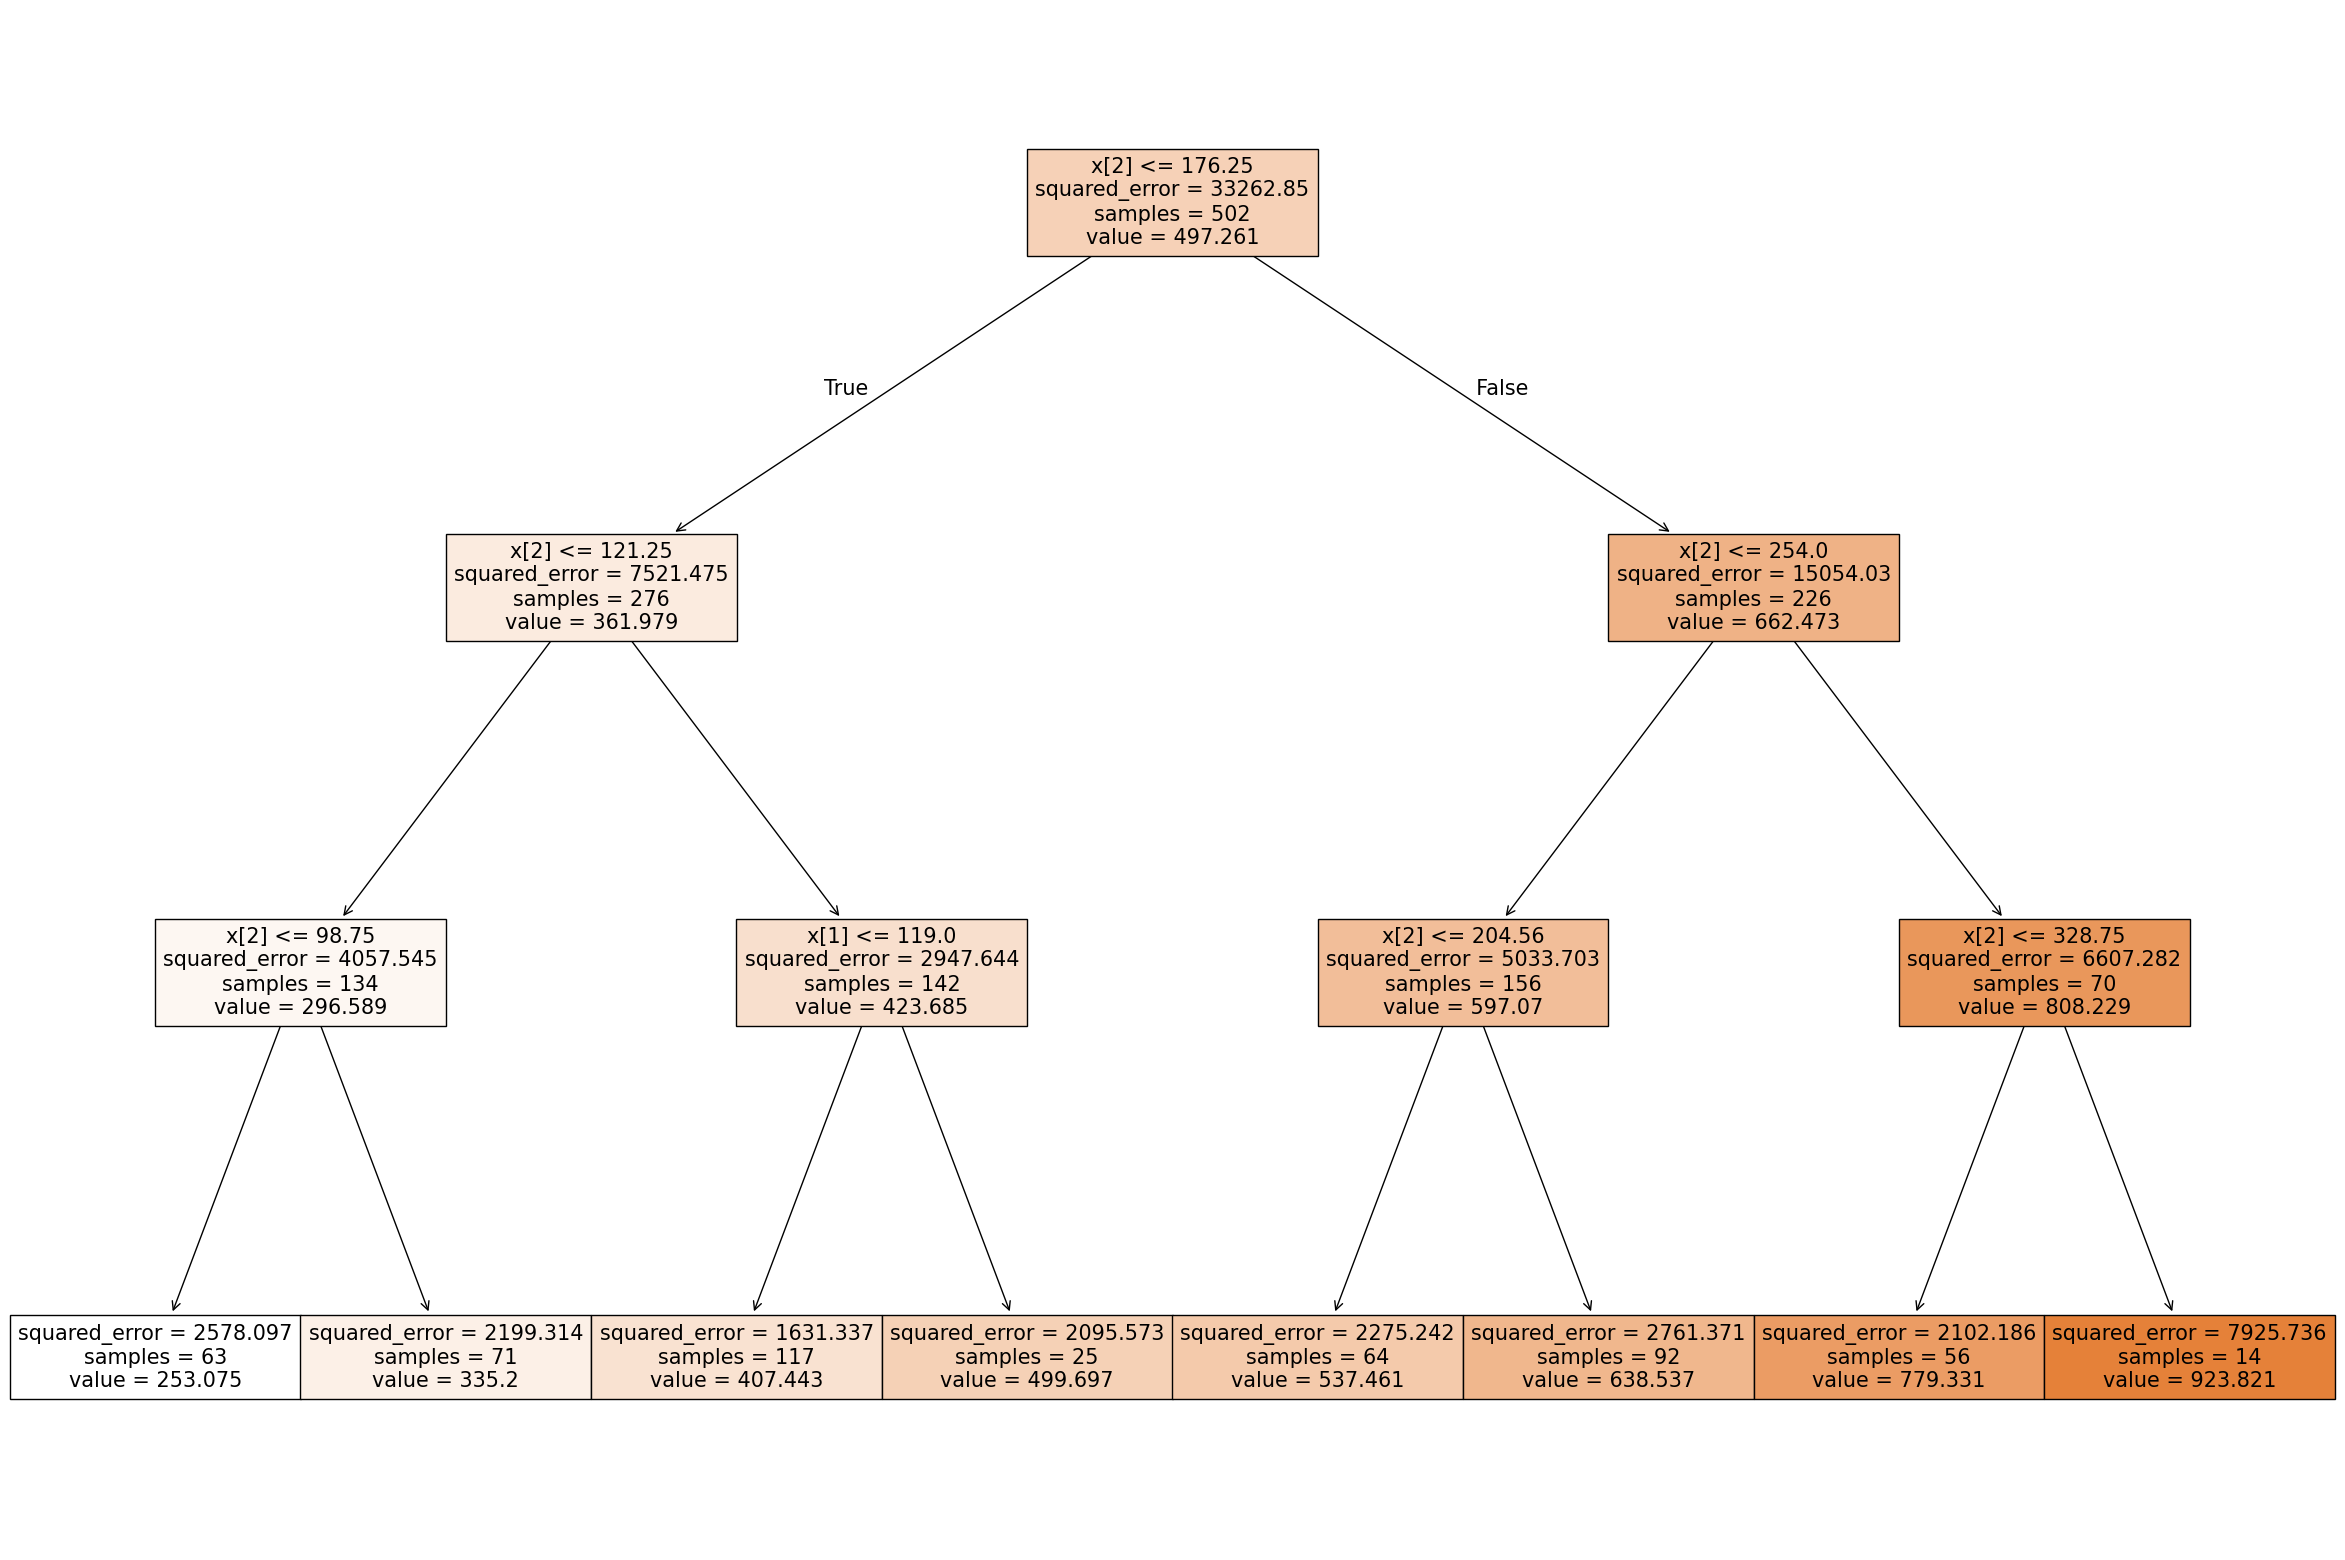

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()